In [77]:
import scipy.io
import os
import re
import glob
import importlib

import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


import utils as util
import plotting as putil
import importlib

In [78]:
putil.set_sns_style(style='dark', min_fontsize=12)

In [79]:
#rootdir = '/mnt/minerva/courtship-videos'
rootdir = '/Volumes/Julie'
videodir = os.path.join(rootdir, 'courtship-videos')
# rootdir = '/mnt/sda/Videos'
assay='single_20mm_1x1'

sessionpaths = sorted(glob.glob(os.path.join(videodir, assay, '202*')), key=util.natsort)
len(sessionpaths)

67

In [80]:
ftdir = os.path.join( rootdir, 'analysis/FlyTracker')
#basedir = '/mnt/minerva/analysis/FlyTracker'
# matlab_src = '/home/julianarhee/Documents/projects/flytracker-analysis/overviews2/Ddata.mat'
matlab_src = os.path.join(ftdir, 'flytracker-matlab/overviews2/Ddata.mat')
# Set save dir
destdir = os.path.join(ftdir, 'figures')
if not os.path.exists(destdir):
    os.makedirs(destdir)
# set FIGID
figid = 'flytracker-matlab/overviews2/Ddata.mat'

In [81]:
bouts_fpath = os.path.join(ftdir, 'bouts.pkl')
bouts = pd.read_pickle(bouts_fpath) # encoding='latin1')
bouts.head()

,species,acquisition,Disengaged,copulation,level_4,boutnum,boutdur,All Wing Extensions,Putative Tap Events,Chasing,...,fg_body_ratio,contrast,dist_to_wall,dist_to_other,leg_dist,level_3,min_wing_ang,max_wing_ang,angle_between,facing_angle
0,mau,20220128-1516_mauR4_4do_gh,0.0,False,0,1.0,1.150,1.0,0.0,0.0,...,2.218111,0.225596,1.752001,13.093457,10.490695,0,0.057471,1.087247,1.824932,2.441036
1,mau,20220128-1516_mauR4_4do_gh,0.0,False,1,3.0,1.125,1.0,0.0,0.0,...,1.690128,0.218294,1.996175,13.139522,10.480900,0,0.125887,0.575673,1.582413,2.617510
2,mau,20220128-1516_mauR4_4do_gh,0.0,False,2,5.0,0.800,0.0,0.0,0.0,...,1.817396,0.207082,4.215794,4.849907,2.347096,0,0.080530,0.134817,2.400323,0.452090
3,mau,20220128-1516_mauR4_4do_gh,0.0,False,3,7.0,0.250,0.0,1.0,0.0,...,4.062264,0.208867,4.599199,2.957937,0.021178,0,0.082898,0.175348,2.995642,0.521262
4,mau,20220128-1516_mauR4_4do_gh,0.0,False,4,9.0,0.025,0.0,1.0,0.0,...,2.914865,0.213331,4.647056,2.854628,0.054126,0,0.080420,0.181953,2.971630,0.541993


In [82]:
events_fpath = os.path.join(ftdir, 'events.pkl')
evs = pd.read_pickle(events_fpath) #

In [83]:
bouts['max_wing_ang_deg'] = np.rad2deg(bouts['max_wing_ang'] )

In [84]:
species_cmap = sns.color_palette('colorblind', n_colors=bouts[(bouts['copulation'])]['species'].nunique())

curr_species = bouts[(bouts['copulation'])]['species'].unique()
print(curr_species)

species_palette = dict((sp, col) for sp, col in zip(curr_species, species_cmap))

['mau' 'mel' 'sant' 'yak']


In [85]:
curracq = '20220128-1516_mauR4_4do_gh'
df_ = bouts[bouts['acquisition']==curracq].copy()
bouts['species'].unique()

array(['mau', 'mel', 'rsim', 'sant', 'yak'], dtype=object)

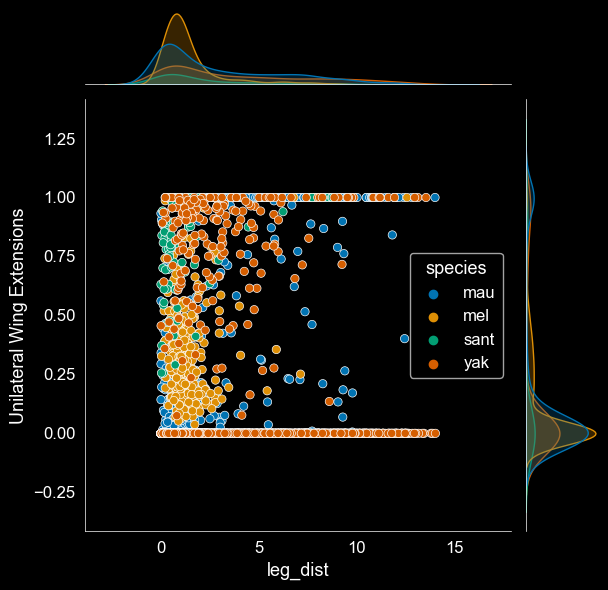

In [86]:
#fig, ax = pl.subplots()
df_=bouts[bouts['species'].isin(curr_species)].copy()
sns.jointplot(data=df_, x='leg_dist', y='Unilateral Wing Extensions',
              hue='species', palette=species_palette) # hue='species')

In [87]:
behavior_names = ['Orienting', 'Putative Tap Events', 
                  'Chasing', 'Unilateral Wing Extensions', 
                  'Licking/Proboscis Ext', 'Copulation Attempts']


In [88]:
plotdf = bouts[bouts['species'].isin(curr_species)].copy()

/Users/julianarhee/miniforge3/envs/flytracker/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.00392156862745098, 0.45098039215686275, 0.6980392156862745)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/julianarhee/miniforge3/envs/flytracker/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8705882352941177, 0.5607843137254902, 0.0196078431372549)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/julianarhee/miniforge3/envs/flytracker/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.00784313725490196, 0.6196078431372549, 0.45098039215686275)) for an unfill

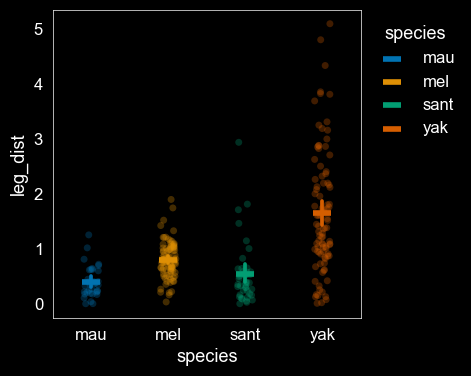

In [89]:
# Get indices where doing >=2 behaviors
several_behavs = plotdf[plotdf[behavior_names].sum(axis=1)>=2].index

fig, ax = pl.subplots()
sns.stripplot(data=plotdf.loc[several_behavs], x='species', y='leg_dist',
              jitter=True, alpha=0.3, hue='species', palette=species_palette, legend=0)
sns.pointplot(data=plotdf.loc[several_behavs], x='species', y='leg_dist', 
              join=False, hue='species', palette=species_palette, markers='_', scale=2)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)

In [75]:
plot_behaviors = ['Orienting', 'Putative Tap Events', 
                  'Chasing', 'Unilateral Wing Extensions', 
                  'Licking/Proboscis Ext', 'Copulation Attempts']


mat_cum-hists_frac-behav-in-bout
/Volumes/Julie/analysis/FlyTracker/figures


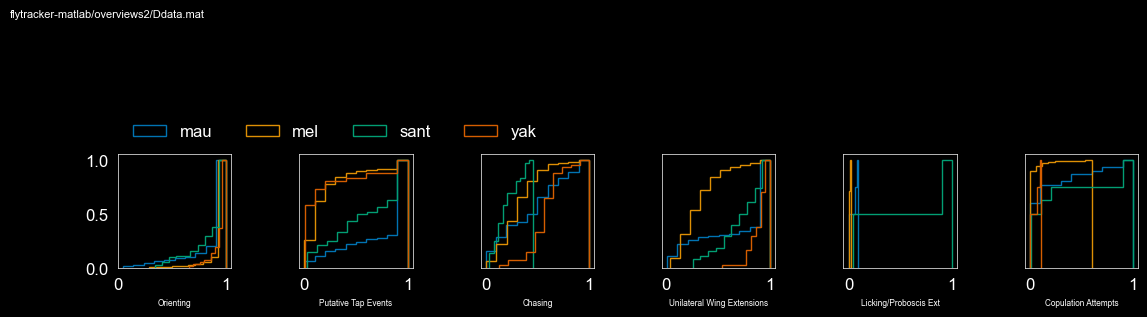

In [93]:
plotdf = bouts[(bouts['Disengaged']==0) & (bouts['copulation'])]
#fig, axn = pl.subplots(2, int(len(behavior_ordered)/2), figsize=(8,6), sharex=False, sharey=True)
fig, axn = pl.subplots(1, len(plot_behaviors), figsize=(12,4), sharex=False, sharey=True)

for ai, behav in enumerate(plot_behaviors):
    ax=axn.flat[ai]
    for sp in curr_species:
        vals = bouts[(bouts['Disengaged']==0) & (bouts['copulation']) 
             & (bouts['species']==sp) & (bouts[behav]>0)][behav].copy()
        ax.hist(vals, cumulative=True, density=True, label=sp, edgecolor=species_palette[sp],
           alpha=1, fill=False, histtype='step')
    if ai==0:
        ax.legend(loc='lower left', bbox_to_anchor=(0, 1), ncol=4, frameon=False)
    ax.set_box_aspect(1)
    ax.set_xlabel(behav, fontsize=6)
pl.subplots_adjust(left=0.1, right=0.95, wspace=0.6, hspace=0.3)

putil.label_figure(fig, figid)
figname='mat_cum-hists_frac-behav-in-bout' #.format(xvar, yvar, huevar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)